In [3]:
import numpy as np 
import geopandas as gpd 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
import pandas as pd 
from shapely.geometry import shape 
# from shapely.geometry import Polygon 
import json 
from shapely import wkt 
from shapely.geometry import Point
from shapely.geometry import box
from math import cos, radians
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable
import seaborn as sns 
import contextily as ctx
import xarray as xr

## CAL FIRE Damage Inspection (DINS) Data

https://gis.data.cnra.ca.gov/datasets/CALFIRE-Forestry::cal-fire-damage-inspection-dins-data/about

CAL FIRE Damage Inspection Program (DINS) database of structures damaged and destroyed by wildland fire in California since 2013.

Damage Percentage	Description

1-10%	Affected Damage
10-25%	Minor Damage
25-50%	Major Damage
50-100%	Destroyed
No Damage	No Damage


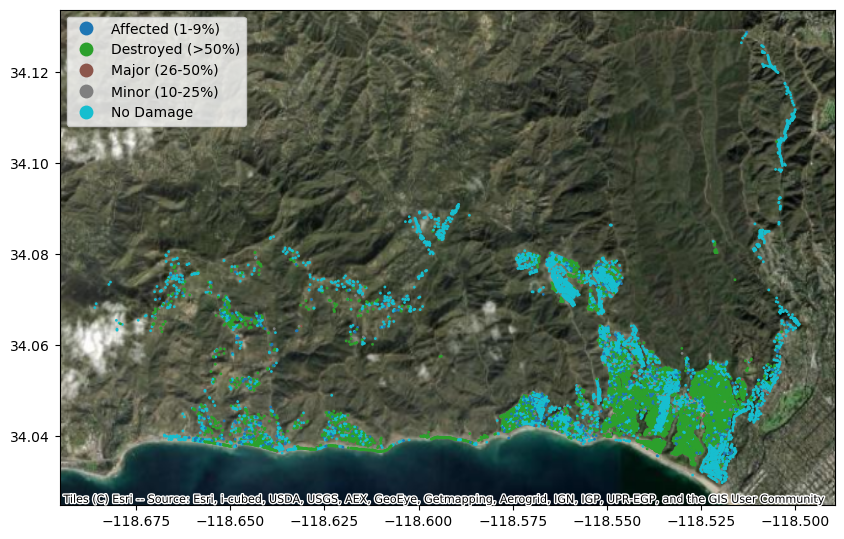

In [4]:
dins_gdf = gpd.read_file("https://services1.arcgis.com/jUJYIo9tSA7EHvfZ/arcgis/rest/services/POSTFIRE_MASTER_DATA_SHARE/FeatureServer/0/query?where=INCIDENTNAME%20%3D%20'PALISADES'&resultType=tile&maxRecordCountFactor=100000&outFields=*&outSR=4326&f=geojson")
dins_gdf

f,ax=plt.subplots(figsize=(10,10))

dins_gdf.plot(ax=ax,column="DAMAGE", s=1, legend=True)

ctx.add_basemap(ax,crs=dins_gdf.crs,source=ctx.providers.Esri.WorldImagery)

### Subset the data to 2025 LA Fire

In [18]:
fire_perimeter_fp = '../Data/fires_perimeter.geojson'
fire_perimeter_gdf = gpd.read_file(fire_perimeter_fp)

In [35]:
dins_gdf = dins_gdf.to_crs(fire_perimeter_gdf.crs)
overlap_gdf = gpd.clip(dins_gdf,fire_perimeter_gdf)

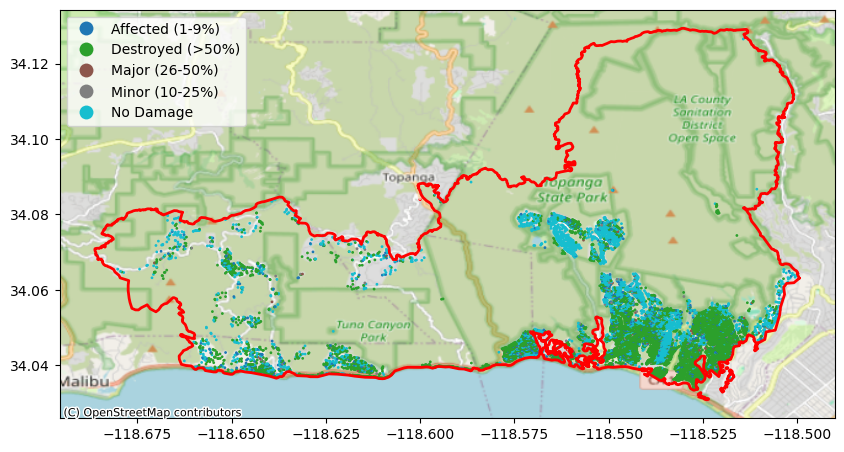

In [36]:
f,ax=plt.subplots(figsize=(10,10))

overlap_gdf.plot(ax=ax,column="DAMAGE", s=1, legend=True)
gpd.GeoSeries(fire_perimeter_gdf.geometry.iloc[1]).plot(
    ax=ax, edgecolor="red", facecolor="none", linewidth=2
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=overlap_gdf.crs)

In [37]:
pali_dins_gdf = overlap_gdf.copy()

### Hummmmm, only Palisade

find another dataset here for Eaton
https://gis.data.cnra.ca.gov/datasets/CALFIRE-Forestry::dins-2025-eaton-public-view/about

In [38]:
eaton_dins_gdf = gpd.read_file("https://services1.arcgis.com/jUJYIo9tSA7EHvfZ/arcgis/rest/services/DINS_2025_Eaton_Public_View/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")
eaton_dins_gdf = eaton_dins_gdf.to_crs(fire_perimeter_gdf.crs)

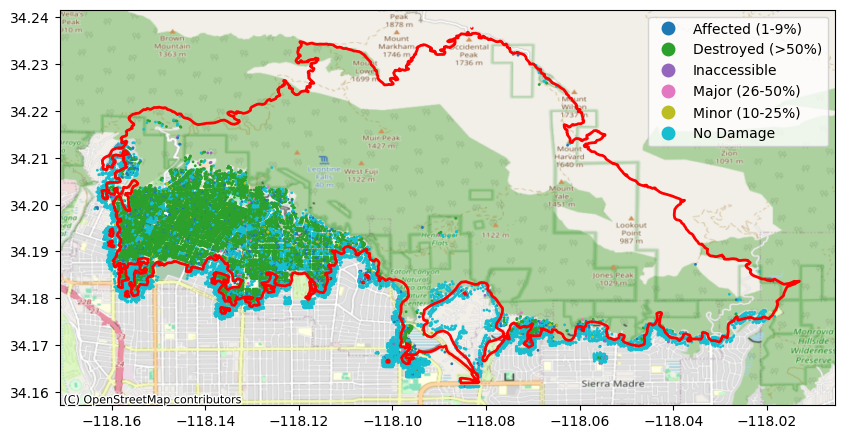

In [39]:
f,ax=plt.subplots(figsize=(10,10))

eaton_dins_gdf.plot(ax=ax,column="DAMAGE", s=1, legend=True)
gpd.GeoSeries(fire_perimeter_gdf.geometry.iloc[0]).plot(
    ax=ax, edgecolor="red", facecolor="none", linewidth=2
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=eaton_dins_gdf.crs)

In [42]:
overlap_gdf = gpd.clip(eaton_dins_gdf,fire_perimeter_gdf)
eaton_dins_gdf = overlap_gdf.copy()

### Now we have the dataset for Palisade and Eaton
"pali_dins_gdf" and "eaton_dins_gdf"

## Let's check out some Statistic now